In [44]:
import re
import pandas as pd
import numpy as np

# Prepare data
trump = pd.read_csv('dataset\\fsas\\fsas_full_utf8_dated.csv')
trump.abstract = trump.apply(lambda row: re.sub(r"http\S+", "", row.abstract).lower(), 1)
trump.abstract = trump.apply(lambda row: " ".join(filter(lambda x: x[0] != "@", row.abstract.split())), 1)
trump.abstract = trump.apply(lambda row: " ".join(re.sub("[^a-zA-Z]+", " ", row.abstract).split()), 1)
# trump = trump.loc[(trump.isRetweet == "f") & (trump.abstract != ""), :]
timestamps = trump.date.to_list()
abstracts = trump.abstract.to_list()

arr_multi = np.array(abstracts)
print(arr_multi)

['a concept of multi valued cognitive maps is introduced in this paper the concept expands the fuzzy one however all variables and weights are not linearly ordered in the concept but are only partially ordered such an approach allows us to operate in cognitive maps with partially ordered linguistic variables directly without vague fuzzification defuzzification methods hence we may consider more subtle differences in degrees of experts uncertainty than in the fuzzy case we prove the convergence of such cognitive maps and give two simple computational examples which demonstrate using such a partially ordered uncertainty degree scale compared to the fuzzy case'
 'in this paper we investigate the fixed time synchronization for fuzzy inertial neural networks with time varying coefficients and time delays the fuzzy inertial neural networks are transformed into two forms of first order differential systems and then two kinds of different controllers of time variable are designed in these sche

In [45]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_model = CountVectorizer(stop_words="english")

# topic_model = BERTopic(verbose=True, nr_topics="auto", vectorizer_model=vectorizer_model,top_n_words=20)
topic_model = BERTopic(verbose=True, nr_topics="auto", top_n_words=20)
topics, probs = topic_model.fit_transform(abstracts)

embedding_model = "sentence-transformers/all-MiniLM-L6-v2"
topic_model.save("\\model_dir\\", serialization="pytorch", save_ctfidf=True, save_embedding_model=embedding_model)

Batches:   0%|          | 0/269 [00:00<?, ?it/s]

2023-06-29 14:24:25,689 - BERTopic - Transformed documents to Embeddings
2023-06-29 14:24:36,078 - BERTopic - Reduced dimensionality
2023-06-29 14:24:36,333 - BERTopic - Clustered reduced embeddings
2023-06-29 14:24:38,265 - BERTopic - Reduced number of topics from 153 to 91


In [46]:
loaded_model = BERTopic.load("\\model_dir\\")

In [47]:
nr_bins = 30

In [48]:
topics_over_time = topic_model.topics_over_time(abstracts, timestamps, nr_bins=nr_bins)

30it [00:03,  8.30it/s]


In [49]:
top_n_topics = 7
img = topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=top_n_topics)
img.show()

file_name = "plt\\plt_b_" +  str(nr_bins) + "_t_" + str(top_n_topics) + ".html"
# img.write_image("test.png")
img.write_html(file_name)

In [58]:
img1 = topic_model.visualize_topics_over_time(topics_over_time, topics=[n+1 for n in range (7)])
img1.show()

file_html_name = "plt\\plt_b_" +  str(nr_bins) + "_t_" + str(top_n_topics) + ".html"
file_png_name = "plt\\plt_b_" +  str(nr_bins) + "_t_" + str(top_n_topics) + ".png"
# img.write_image("test.png")
img1.write_html(file_html_name)
img1.write_image(file_png_name)

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [51]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,2480,-1_the_of_and_to,"[the, of, and, to, fuzzy, is, in, are, this, f...",[a simple and effective method for selecting s...
1,0,2239,0_fuzzy_of_and_we,"[fuzzy, of, and, we, the, spaces, in, sets, is...",[the concept of representation of a given fami...
2,1,364,1_control_controller_stability_design,"[control, controller, stability, design, syste...",[this paper studies the fuzzy observer based c...
3,2,354,2_preference_decision_alternatives_making,"[preference, decision, alternatives, making, c...",[in multiperson decision making situations it ...
4,3,194,3_possibility_probability_measures_conditional,"[possibility, probability, measures, condition...",[conditioning for non additive uncertainty mea...
...,...,...,...,...,...
86,85,11,85_complex_numbers_derivative_mapping,"[complex, numbers, derivative, mapping, differ...",[in this note we show by counterexamples that ...
87,86,11,86_syntopogenous_structures_spaces_neighbourhood,"[syntopogenous, structures, spaces, neighbourh...",[initial fuzzy syntopogenous structures produc...
88,87,11,87_power_stabilizer_oscillations_system,"[power, stabilizer, oscillations, system, damp...",[power system transient stability is one of th...
89,88,11,88_iterative_numerical_fredholm_method,"[iterative, numerical, fredholm, method, equat...",[in this paper we obtain the error estimation ...


In [52]:
topic_model.visualize_topics()

In [53]:
topic_model.visualize_heatmap()

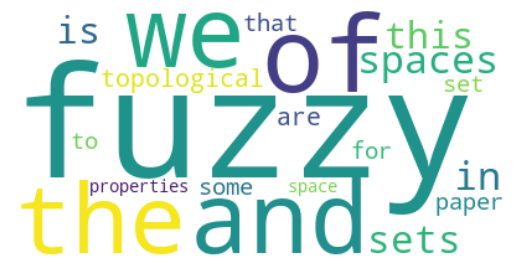

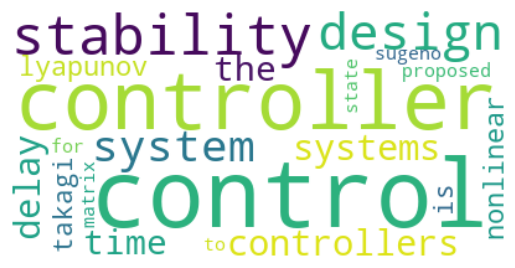

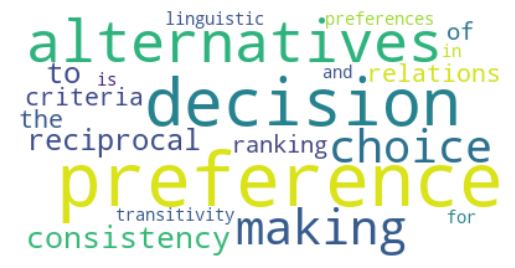

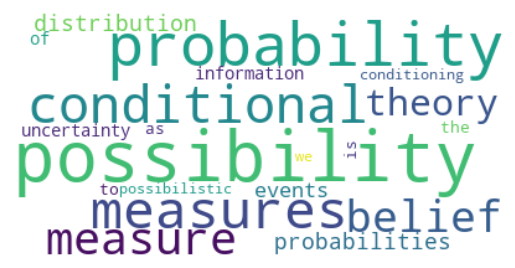

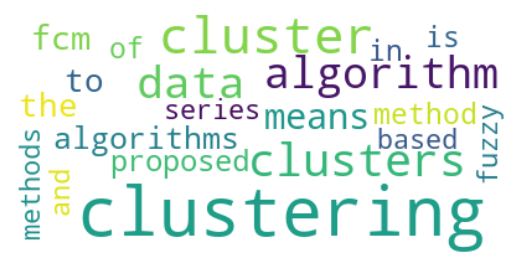

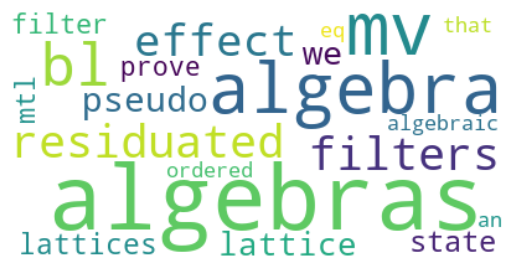

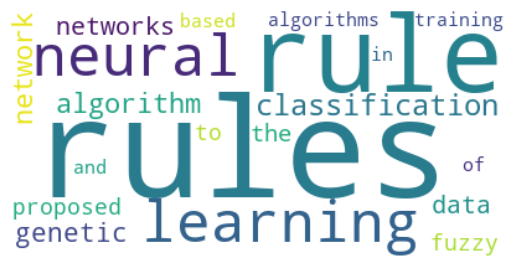

In [57]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(model, topic):
    text = {word: value for word, value in model.get_topic(topic)}
    # print(len(text))
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Show wordcloud
for i in range(7):
    create_wordcloud(topic_model, topic=i)

In [ ]:
top_n_topics = 7
img = topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=top_n_topics)
img.show()

file_name = "plt\\plt_b_" +  str(nr_bins) + "_t_" + str(top_n_topics) + ".html"
# img.write_image("test.png")
img.write_html(file_name)

In [24]:
img1 = topic_model.visualize_topics_over_time(topics_over_time, topics=[n+2 for n in range (5)])
img1.show()

file_html_name = "plt\\plt_b_" +  str(nr_bins) + "_t_" + str(top_n_topics) + ".html"
file_png_name = "plt\\plt_b_" +  str(nr_bins) + "_t_" + str(top_n_topics) + ".png"
# img.write_image("test.png")
img1.write_html(file_html_name)
img1.write_image(file_png_name)

In [25]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,2714,-1_fuzzy_paper_control_based,"[fuzzy, paper, control, based, proposed, model...",[data driven fuzzy modeling has been used in a...
1,0,2421,0_fuzzy_spaces_sets_set,"[fuzzy, spaces, sets, set, topological, paper,...",[in this paper we establish a coincidence theo...
2,1,560,1_control_controller_stability_systems,"[control, controller, stability, systems, desi...",[in this paper the design problems of h output...
3,2,193,2_possibility_probability_measures_conditional,"[possibility, probability, measures, condition...",[the theory of possibility described in this p...
4,3,131,3_ideals_ring_ideal_prime,"[ideals, ring, ideal, prime, algebra, semigrou...",[the aim of this paper is to study fuzzy ideal...
...,...,...,...,...,...
76,75,11,75_syntopogenous_structures_neighbourhood_topo...,"[syntopogenous, structures, neighbourhood, top...",[initial fuzzy syntopogenous structures produc...
77,76,11,76_control_refuse_process_controller,"[control, refuse, process, controller, inciner...",[this paper introduces a new fuzzy control tec...
78,77,11,77_points_planes_lines_point,"[points, planes, lines, point, distance, space...",[this paper provides a detailed analysis of fu...
79,78,11,78_stopping_optimal_times_reward,"[stopping, optimal, times, reward, perceptive,...",[we formulate a stopping problem for dynamic f...


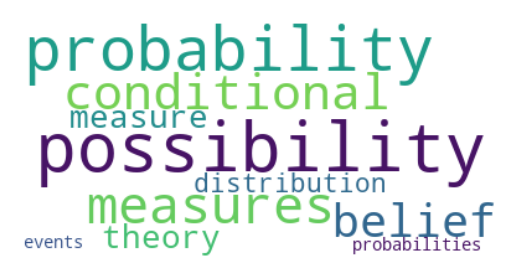

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(model, topic):
    text = {word: value for word, value in model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Show wordcloud
create_wordcloud(topic_model, topic=2)